In [1]:
import pandas as pd
import os

from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

In [2]:
def read_image_data(data_path, subset=False):

    folders = sorted(os.listdir(data_path))
    images, labels = [], []
    label_dict = {}

    # if ".DS_Store" in folders:
    #     folders.remove(".DS_Store")
        
    for label_no in range(len(folders)):
        folder = folders[label_no]
        label_dict[label_no] = folder
        # oslistdir = sorted(os.listdir(f"{data_path}/{folder}")) 
        oslistdir = sorted(os.listdir(os.path.join(os.getcwd(),data_path,folder))) 
        oslistdir = oslistdir[:10] if subset else oslistdir
        
        for image_name in oslistdir:
            # if image_name == ".DS_Store":
            #     continue

            image_path = f"{data_path}/{folders[label_no]}/{image_name}"
            
            # Convert image value into np array
            image = io.imread(image_path)
            
            # If image is grayscale, convert
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

            images.append(image)
            labels.append(label_no)
        
        print(f"\t [{((label_no + 1)/len(folders)) * 100:.1f} %] Fetching label '{folder}'           ", end='\r')
            
    print()
    df = pd.DataFrame()
    df['Image_Id'] = [i for i in range(len(images))]
    df['Image'] = images
    df['Label'] = labels
    return df, label_dict

# loading the folder image data and convert into nd array
training_data, label_dict_Train = read_image_data("Training")
print(label_dict_Train)

testing_data, label_dict_Test = read_image_data("Testing")
print(label_dict_Test)


	 [100.0 %] Fetching label 'pituitary'           
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}
	 [100.0 %] Fetching label 'pituitary'           
{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


In [3]:
print(training_data)
print(training_data["Image"].apply(np.shape))

      Image_Id                                              Image  Label
0            0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
1            1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2            2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
3            3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
4            4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
...        ...                                                ...    ...
5707      5707  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5708      5708  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5709      5709  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5710      5710  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
5711      5711  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3

[5712 rows x 3 columns]
0       (512, 512, 3)
1       (512, 512, 3)
2       (512, 512, 3)
3       (512, 512, 3)
4       (51

In [4]:
print(testing_data)
print(testing_data["Image"].apply(np.shape))


      Image_Id                                              Image  Label
0            0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
1            1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2            2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
3            3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
4            4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
...        ...                                                ...    ...
1306      1306  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
1307      1307  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
1308      1308  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      3
1309      1309  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3
1310      1310  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      3

[1311 rows x 3 columns]
0       (512, 512, 3)
1       (512, 512, 3)
2       (512, 512, 3)
3       (512, 512, 3)
4       (51

In [5]:
# 1. Training Dataset
training_data["Dim"] = training_data["Image"].apply(np.shape)
training_data['width'], training_data['height'], training_data["dim"] = zip(*training_data.Dim) # * <- unpacks the array's elements

# based on the below image, greyscaling is needed for dimension reduction


In [6]:
# Checking for potential image values not rgb
errors = training_data[training_data['dim'] != 3]
errors

# these are RGBA values

,Image_Id,Image,Label,Dim,width,height,dim
3671,3671,"[[[0, 0, 0, 255], [0, 0, 0, 255], [0, 0, 0, 25...",2,"(664, 550, 4)",664,550,4
3679,3679,"[[[9, 9, 9, 255], [9, 9, 9, 255], [9, 9, 9, 25...",2,"(400, 393, 4)",400,393,4
3680,3680,"[[[255, 255, 255, 255], [5, 5, 5, 255], [10, 1...",2,"(454, 442, 4)",454,442,4


In [7]:
# Greyscaling
from skimage.color import rgba2rgb, rgb2gray

# Changing those with RGBA values tp RGB
mask = (training_data['dim'] == 4)
training_data.loc[mask, 'Image'] = training_data.loc[mask, 'Image'].apply(rgba2rgb)

# Then greyscaling
training_data['greyscale_image'] = training_data['Image'].apply(rgb2gray)
training_data


,Image_Id,Image,Label,Dim,width,height,dim,greyscale_image
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...
5707,5707,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5708,5708,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5709,5709,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00..."
5710,5710,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [8]:
# 2. Testing Dataset
from skimage.color import rgb2gray

testing_data["Dim"] = testing_data["Image"].apply(np.shape)
testing_data['width'], testing_data['height'], testing_data["dim"] = zip(*testing_data.Dim) # * <- unpacks the array's elements
testing_data

,Image_Id,Image,Label,Dim,width,height,dim
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3
...,...,...,...,...,...,...,...
1306,1306,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3
1307,1307,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3
1308,1308,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",3,"(512, 512, 3)",512,512,3
1309,1309,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3


In [9]:
# Checking for potential image values not rgb
errors = testing_data[testing_data['dim'] != 3]
errors


,Image_Id,Image,Label,Dim,width,height,dim


In [10]:
# Greyscaling
from skimage.color import rgb2gray

# Then greyscaling
testing_data['greyscale_image'] = testing_data['Image'].apply(rgb2gray)
testing_data

,Image_Id,Image,Label,Dim,width,height,dim,greyscale_image
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...
1306,1306,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1307,1307,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098..."
1308,1308,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",3,"(512, 512, 3)",512,512,3,"[[0.00392156862745098, 0.00392156862745098, 0...."
1309,1309,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# EDA

## 1. Image Class Frequency

C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/536939905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/536939905.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/536939905.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=55)


[Text(0, 0, 'glioma'),
 Text(1, 0, 'meningioma'),
 Text(2, 0, 'notumor'),
 Text(3, 0, 'pituitary')]

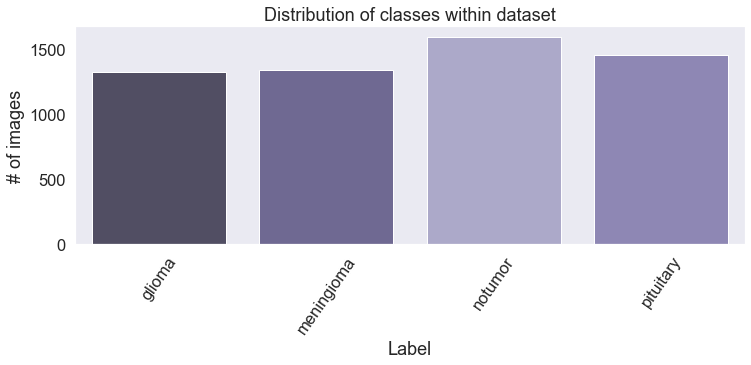

In [11]:
# Training's class frequency
plt.figure(figsize=(12,4))

labels = training_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])


plt.title("Distribution of classes within dataset")
plt.ylabel("# of images")
plt.xlabel("Label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/4058565728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/4058565728.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_15448/4058565728.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=55)


[Text(0, 0, 'glioma'),
 Text(1, 0, 'meningioma'),
 Text(2, 0, 'notumor'),
 Text(3, 0, 'pituitary')]

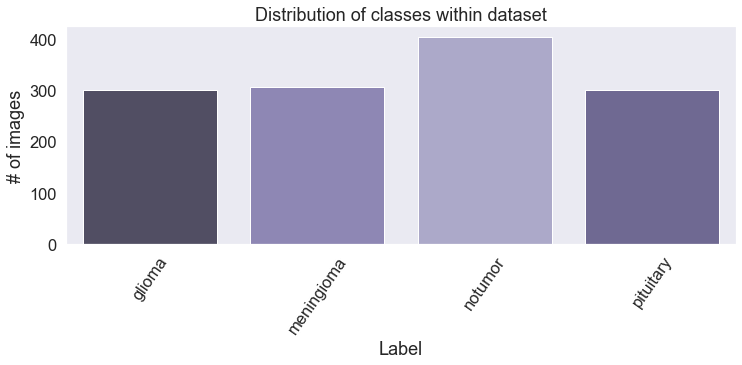

In [12]:
# Testing's class frequency
plt.figure(figsize=(12,4))

labels = testing_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])


plt.title("Distribution of classes within dataset")
plt.ylabel("# of images")
plt.xlabel("Label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

## 2. Image Size Distribution

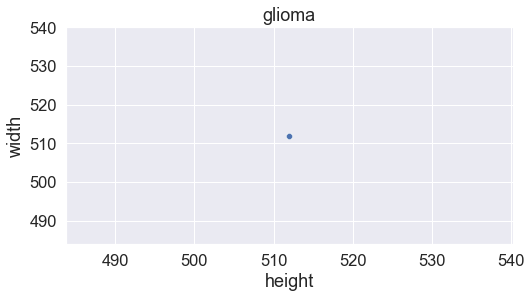

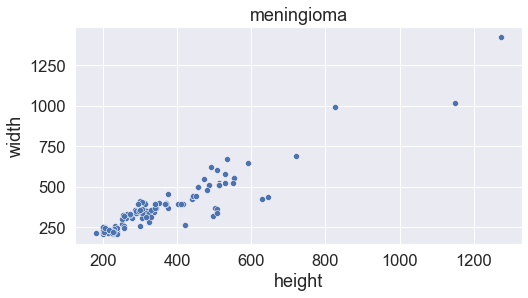

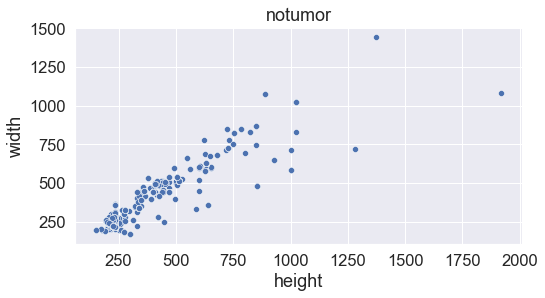

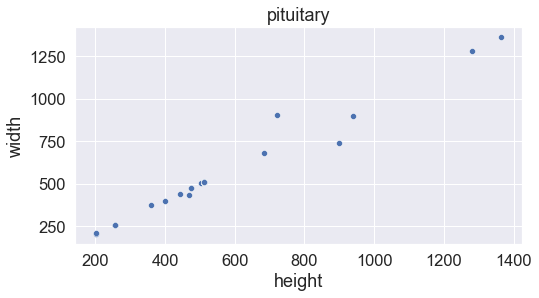

In [13]:
# Image Dimensions in terms of width and height distribution

# Training Dataset
sns.set_style('darkgrid')

for tumor_type in label_dict_Train:
    plt.figure(figsize=(8,4))
    ax = sns.scatterplot(y = 'width', x = 'height', data=training_data[training_data['Label']==tumor_type])
    ax.set(title=label_dict_Train[tumor_type])

# considering resizing to a standard image size too maybe

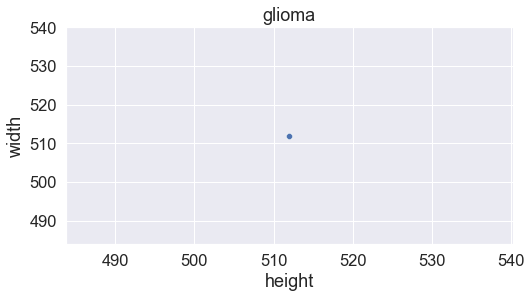

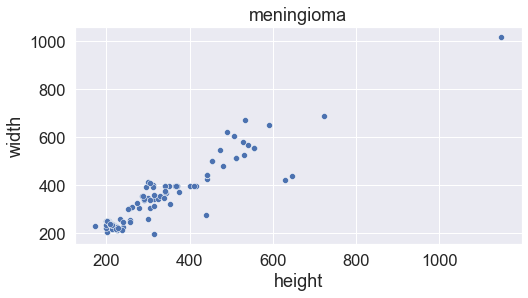

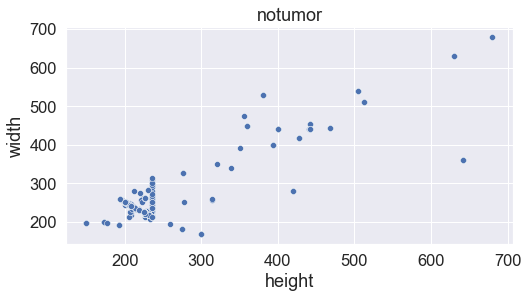

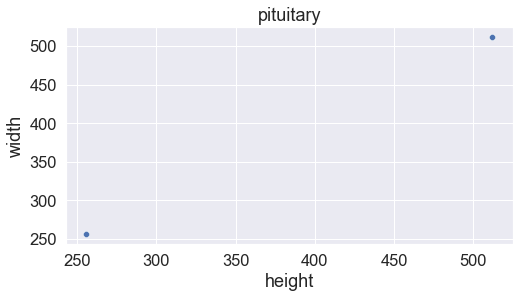

In [14]:
# Testing Dataset
sns.set_style('darkgrid')

for tumor_type in label_dict_Test:
    plt.figure(figsize=(8,4))
    ax = sns.scatterplot(y = 'width', x = 'height', data=testing_data[testing_data['Label']==tumor_type])
    ax.set(title=label_dict_Test[tumor_type])

In [ ]:
# Export Dataframe
training_data.to_csv("Training_Data.csv")
testing_data.to_csv("Testing_data.csv")

### extra

In [15]:
train_gt_path = os.path.join(os.getcwd(),"Training","glioma")
train_mt_path = os.path.join(os.getcwd(),"Training","meningioma")
train_nt_path = os.path.join(os.getcwd(),"Training","notumor")
train_pt_path = os.path.join(os.getcwd(),"Training","pituitary")

test_gt_path = os.path.join(os.getcwd(),"Testing","glioma")
test_mt_path = os.path.join(os.getcwd(),"Testing","meningioma")
test_nt_path = os.path.join(os.getcwd(),"Testing","notumor")
test_pt_path = os.path.join(os.getcwd(),"Testing","pituitary")


In [16]:
print(len(os.listdir(train_gt_path))) # number of glioma_tumor in training set
print(len(os.listdir(train_mt_path))) # number of meningioma_tumor in training set
print(len(os.listdir(train_nt_path))) # number of no_tumor in training set
print(len(os.listdir(train_pt_path))) # number of pituitary_tumor in training set

print(len(os.listdir(test_gt_path))) # number of glioma_tumor in test set
print(len(os.listdir(test_mt_path))) # number of meningioma_tumor in test set
print(len(os.listdir(test_nt_path))) # number of no_tumor in test set
print(len(os.listdir(test_pt_path))) # number of pituitary_tumor in test set


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\Users\\Asus\\aug10\\Jun9\\Z_assignments\\Year 3\\Sem 2\\Deep learning\\Ass Code\\brain-tumor\\Training\\glioma_tumor'

In [ ]:
image_folder_paths = [train_gt_path,train_mt_path,train_nt_path,train_pt_path,test_gt_path,test_mt_path,test_nt_path,test_pt_path]

# create a df
images_df = pd.DataFrame(columns=["image_path","tumor_class"])

for folder in image_folder_paths:
    tumor_class = os.path.basename(folder)
    folder_df = pd.DataFrame({"image_path":[os.path.join(folder,image_path) for image_path in os.listdir(folder)],"tumor_class":[tumor_class]*len(os.listdir(folder))})
    images_df = pd.concat([images_df,folder_df],ignore_index=True)



In [ ]:
images_df

,image_path,tumor_class
0,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
1,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
2,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
3,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
4,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
...,...,...
3259,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3260,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3261,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3262,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor


In [ ]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3264 non-null   object
 1   tumor_class  3264 non-null   object
dtypes: object(2)
memory usage: 51.1+ KB
